In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import sklearn
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
df = df.iloc[:30000]

In [6]:
y = df["class"]
y = y.map({"p":-1, "e":1})

In [7]:
X = df.drop(["class"], axis=1)

In [8]:
X.isnull().sum()  

id                          0
cap-diameter                0
cap-shape                   0
cap-surface              6498
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          5036
gill-spacing            12028
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               26561
stem-surface            18968
stem-color                  0
veil-type               28538
veil-color              26444
has-ring                    0
ring-type                1209
spore-print-color       27407
habitat                     1
season                      0
dtype: int64

In [9]:
X.shape

(30000, 21)

In [10]:
y.value_counts()

class
-1    16503
 1    13497
Name: count, dtype: int64

In [11]:
X = X.drop(["stem-root", "veil-type", "veil-color", "spore-print-color", "id"], axis=1)

In [12]:
X.shape

(30000, 16)

In [13]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


In [14]:
X = X.drop(["gill-spacing", "stem-surface"], axis=1)

In [15]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,w,4.51,15.39,w,f,f,d,a
1,4.51,x,h,o,f,a,n,4.79,6.48,o,t,z,d,w
2,6.94,f,s,b,f,x,w,6.85,9.93,n,f,f,l,w
3,3.88,f,y,g,f,s,g,4.16,6.53,w,f,f,d,u
4,5.85,x,l,w,f,d,w,3.37,8.36,w,f,f,g,a


### Выделение и преобразование категориальных признаков

In [16]:
cat_cols = ["cap-shape","cap-surface",  "cap-color", "does-bruise-or-bleed", "gill-attachment","gill-color", "stem-color", "has-ring", "ring-type", "habitat", "season"]

In [17]:
encoder = LeaveOneOutEncoder(return_df=True)
X1 = encoder.fit_transform(X,y)
X1.dtypes

cap-diameter            float64
cap-shape               float64
cap-surface             float64
cap-color               float64
does-bruise-or-bleed    float64
gill-attachment         float64
gill-color              float64
stem-height             float64
stem-width              float64
stem-color              float64
has-ring                float64
ring-type               float64
habitat                 float64
season                  float64
dtype: object

In [18]:
X1.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,-0.002037,0.244124,-0.060993,-0.118479,-0.295345,0.126729,4.51,15.39,0.150319,-0.070138,-0.098724,-0.068502,-0.154448
1,4.51,-0.038601,0.055175,-0.427257,-0.118398,-0.295024,-0.433035,4.79,6.48,-0.197094,-0.194598,-0.992964,-0.068407,0.285296
2,6.94,-0.002037,0.244124,0.758993,-0.118479,-0.062428,0.126729,6.85,9.93,-0.226161,-0.070138,-0.098724,0.219512,0.284565
3,3.88,-0.002037,0.085587,0.147727,-0.118479,-0.187991,0.040903,4.16,6.53,0.150319,-0.070138,-0.098724,-0.068502,-0.168068
4,5.85,-0.038745,0.189448,-0.010366,-0.118479,-0.149283,0.126729,3.37,8.36,0.150319,-0.070138,-0.098724,-0.337119,-0.154448


In [19]:
X1.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [14]:
X1.fillna(X1.mean(), inplace=True) # избавимся от пропусков в cap-diameter

In [15]:
X1.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

**Посмотрим на корреляцию признаков между собой**

In [32]:
X_corr = X1.copy()

In [33]:
X_corr.insert (loc= len(X_corr.columns) , column='class', value=y)

In [34]:
plt.rcParams["figure.figsize"] = (15,15)

<Axes: >

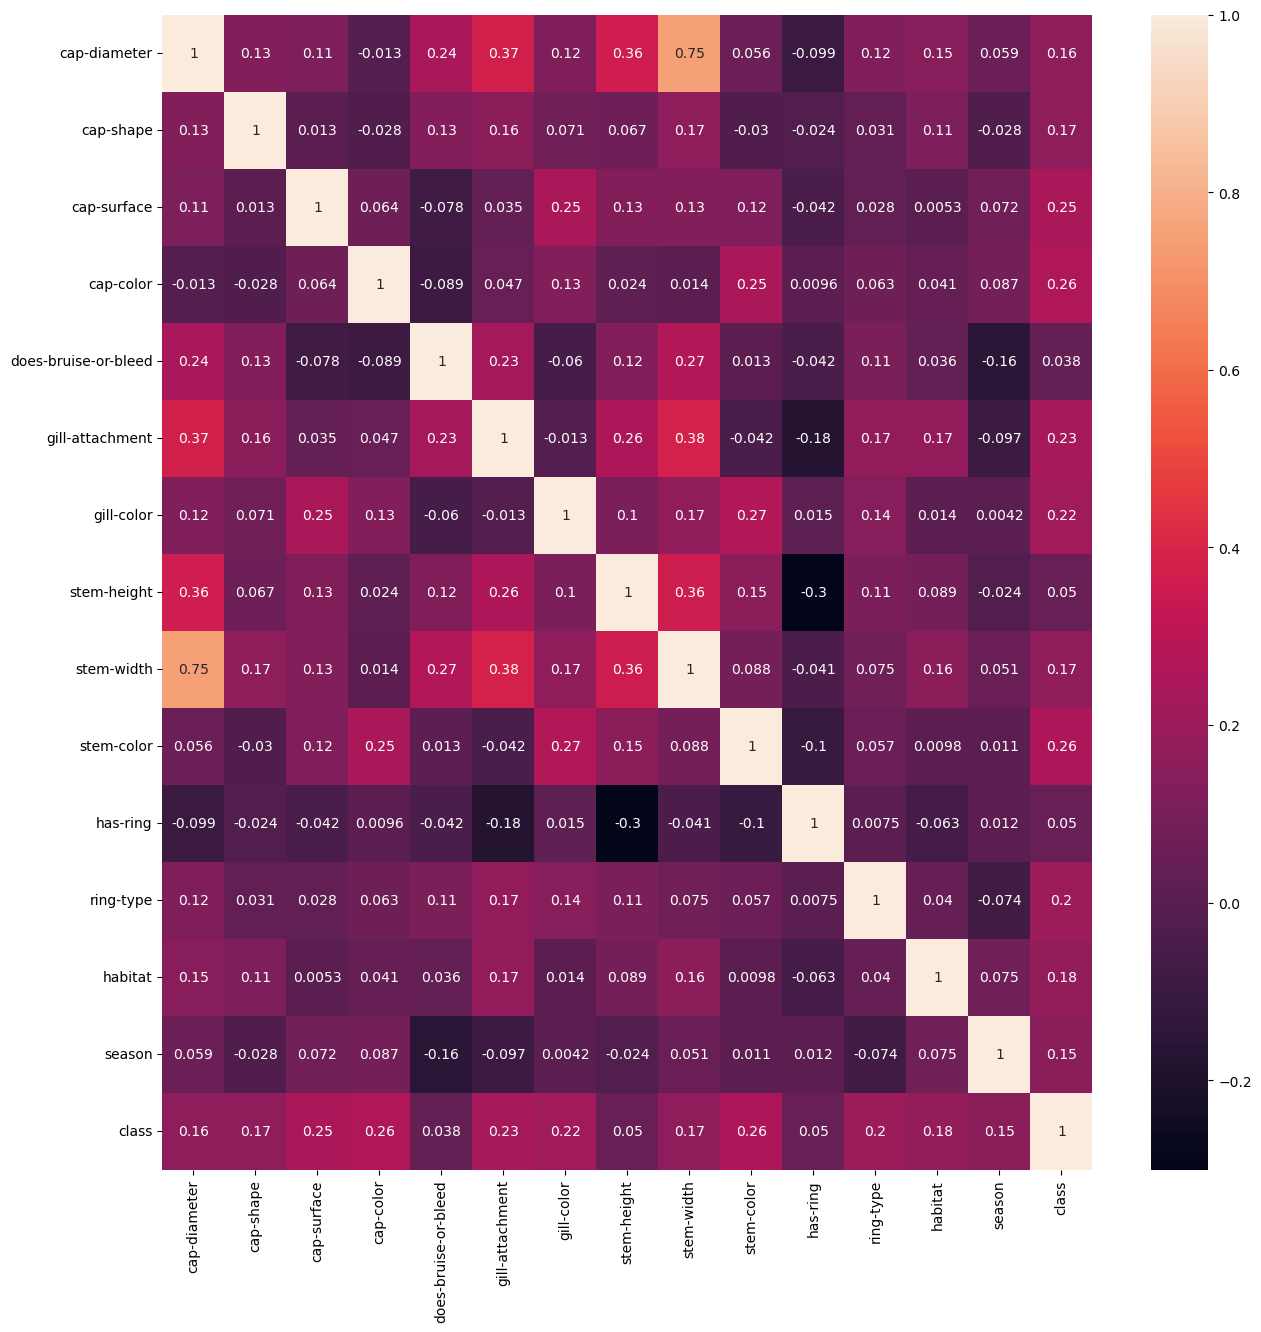

In [35]:
sns.heatmap(X_corr.corr(), annot = True)

**Разделим выборку**

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y, test_size=0.9, random_state=42)

**Обучим линейную модель**

In [15]:
model = LogisticRegression(verbose = 42)
model.fit(Xtrain, ytrain)

y_train = model.predict(Xtrain)
y_test = model.predict(Xtest)

print(accuracy_score(ytrain, y_train))
print(accuracy_score(ytest, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00

 U =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  2.20763D-01


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -9.7656D

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


** Закодируем категориальные признаки с помощью OneHotEncoder**

In [16]:
X3 = X.iloc[:1500000]
y1 = y.iloc[:1500000]

In [18]:
encoder_2 = OneHotEncoder(return_df=True)
X4 = encoder_2.fit_transform(X3,y1)

In [ ]:
X4.head()

In [19]:
X4.isnull().sum()

cap-diameter    1
cap-shape_1     0
cap-shape_2     0
cap-shape_3     0
cap-shape_4     0
               ..
habitat_40      0
season_1        0
season_2        0
season_3        0
season_4        0
Length: 369, dtype: int64

In [23]:
X4.fillna(X4.mean(), inplace=True) # избавимся от пропусков в cap-diameter

In [24]:
X4.isnull().sum()

cap-diameter    0
cap-shape_1     0
cap-shape_2     0
cap-shape_3     0
cap-shape_4     0
               ..
habitat_40      0
season_1        0
season_2        0
season_3        0
season_4        0
Length: 369, dtype: int64

In [25]:
Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(X4, y1, test_size=0.3, random_state=42)

In [26]:
model2 = LogisticRegression()
model2.fit(Xtrain_1, ytrain_1)

y_train_1 = model2.predict(Xtrain_1)
y_test_1 = model2.predict(Xtest_1)

print(accuracy_score(ytrain_1, y_train_1))
print(accuracy_score(ytest_1, y_test_1))

0.7740757142857143
0.7732033333333334


**Масштабируем числовые признаки**

In [47]:
scaler = StandardScaler()
scaler.fit_transform(Xtrain_1)

array([[ 0.15987131, -0.52571712, -0.923845  , ..., -0.31315615,
         1.30618102, -0.21768502],
       [-0.7290642 , -0.52571712,  1.08243265, ..., -0.31315615,
        -0.76559067, -0.21768502],
       [-0.82973883, -0.52571712,  1.08243265, ..., -0.31315615,
         1.30618102, -0.21768502],
       ...,
       [ 0.2069956 ,  1.90216366, -0.923845  , ..., -0.31315615,
        -0.76559067, -0.21768502],
       [ 0.0292085 , -0.52571712,  1.08243265, ..., -0.31315615,
         1.30618102, -0.21768502],
       [-1.0032419 ,  1.90216366, -0.923845  , ..., -0.31315615,
        -0.76559067, -0.21768502]])

In [48]:
X1

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,-0.023890,0.261312,-0.078651,-0.111527,-0.292689,0.143119,4.51,15.39,0.164571,-0.066509,-0.093477,-0.057678,-0.143173
1,4.51,-0.020332,0.059745,-0.434519,-0.111526,-0.292686,-0.429756,4.79,6.48,-0.193312,-0.182206,-0.992318,-0.057677,0.307986
2,6.94,-0.023890,0.261312,0.747912,-0.111527,-0.076904,0.143119,6.85,9.93,-0.221857,-0.066509,-0.093477,0.210151,0.307979
3,3.88,-0.023890,0.076031,0.176156,-0.111527,-0.178318,0.038004,4.16,6.53,0.164571,-0.066509,-0.093477,-0.057678,-0.164923
4,5.85,-0.020333,0.142360,0.005880,-0.111527,-0.142756,0.143119,3.37,8.36,0.164571,-0.066509,-0.093477,-0.349208,-0.143173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,-0.023890,-0.027656,0.018169,-0.013248,-0.277945,0.143119,12.14,18.81,0.164571,-0.182209,0.157052,-0.057678,-0.164923
3116941,10.88,-0.098917,-0.027656,0.005880,-0.013248,-0.142756,-0.180421,6.65,26.97,0.164571,-0.066509,-0.093477,-0.057678,-0.164923
3116942,7.82,-0.020332,0.043146,-0.586495,-0.111526,-0.292686,0.143122,9.51,11.06,-0.387550,-0.182206,-0.992318,-0.057677,-0.143172
3116943,9.45,0.081185,-0.643844,0.018169,-0.013248,0.302067,-0.180421,9.13,17.77,0.164571,-0.182209,-0.028296,-0.057678,-0.164923


In [49]:
X_sc = X1.copy()

In [52]:
X_sc.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,-9.427835e-02,-9.427567e-02,-9.427841e-02,-9.427551e-02,-9.427404e-02,-9.427594e-02,6.348333e+00,1.115379e+01,-9.427664e-02,-9.427323e-02,-9.427318e-02,-9.427512e-02,-9.427404e-02
std,4.657928e+00,1.667941e-01,2.517326e-01,2.574025e-01,3.753081e-02,2.322836e-01,2.190434e-01,2.699755e+00,8.095477e+00,2.561708e-01,4.952452e-02,2.016965e-01,1.768859e-01,1.485441e-01
min,3.000000e-02,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.649230e-01
25%,3.320000e+00,-9.891139e-02,-2.847891e-01,-2.458966e-01,-1.115271e-01,-2.779448e-01,-1.804205e-01,4.670000e+00,4.970000e+00,-2.218567e-01,-6.650867e-02,-9.347727e-02,-5.767800e-02,-1.649212e-01
50%,5.750000e+00,-2.388660e-02,-2.765632e-02,1.816863e-02,-1.115264e-01,-1.427563e-01,-1.547640e-01,5.880000e+00,9.650000e+00,-2.218547e-01,-6.650867e-02,-9.347646e-02,-5.767800e-02,-1.431732e-01
75%,8.240000e+00,-2.033182e-02,5.974499e-02,1.817010e-02,-1.115264e-01,-7.689878e-02,1.431194e-01,7.410000e+00,1.563000e+01,1.645713e-01,-6.650783e-02,-9.347646e-02,-5.767708e-02,-1.431719e-01
max,8.067000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,8.872000e+01,1.029000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.079860e-01


In [53]:
num_cols = X_sc.columns[X_sc.dtypes == 'float64'].tolist()

In [54]:

from sklearn.base import TransformerMixin

class CustomScaler(TransformerMixin):
    def __init__(self, cols, scaler=None):
        self.cols = cols
        self.scaler = scaler or StandardScaler()

    def fit(self, X, y=None):
        num_cols = X.copy()[self.cols]
        self.scaler.fit(num_cols)
        return self
    def transform(self, X, y=None):
        X_res = X.copy()
        num_cols_tr = self.scaler.transform(X_res[self.cols])
        for i, col in enumerate(self.cols):
            X_res[col] = num_cols_tr[:,i]
        return X_res

In [55]:
sc = CustomScaler(num_cols)
X2_sc = sc.fit_transform(X_sc)

In [56]:
X2_sc.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06,3.116945e+06
mean,9.935327e-16,-5.535082e-16,-1.359151e-16,2.777343e-16,6.952425e-16,2.538212e-16,-5.760752e-16,1.106246e-15,1.969617e-15,1.702232e-16,2.805508e-16,1.851410e-16,2.442833e-17,3.115729e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.348207e+00,-5.430180e+00,-3.597962e+00,-3.518699e+00,-2.413283e+01,-3.899226e+00,-4.134907e+00,-2.351448e+00,-1.377780e+00,-3.535623e+00,-1.828845e+01,-4.490543e+00,-5.120391e+00,-4.756093e-01
25%,-6.418839e-01,-2.777702e-02,-7.568089e-01,-5.890315e-01,-4.596663e-01,-7.907178e-01,-3.932763e-01,-6.216615e-01,-7.638569e-01,-4.980273e-01,5.606225e-01,3.946073e-03,2.068968e-01,-4.755977e-01
50%,-1.201926e-01,4.220280e-01,2.646433e-01,4.368531e-01,-4.596455e-01,-2.087201e-01,-2.761467e-01,-1.734726e-01,-1.857563e-01,-4.980196e-01,5.606225e-01,3.950076e-03,2.068968e-01,-3.291894e-01
75%,4.143800e-01,4.433404e-01,6.118424e-01,4.368588e-01,-4.596455e-01,7.480195e-02,1.083782e+00,3.932456e-01,5.529279e-01,1.010451e+00,5.606396e-01,3.950076e-03,2.069020e-01,-3.291806e-01
max,1.596422e+01,6.560657e+00,4.346977e+00,4.251236e+00,2.915673e+01,2.558399e+00,4.995704e+00,3.051080e+01,1.133302e+01,4.271668e+00,2.209559e+01,5.425346e+00,6.186334e+00,2.708018e+00


**Посомтрим на изменение логистической регресии после нормализации данных**

In [57]:
Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(X2_sc, y, test_size=0.3, random_state=42)

In [58]:
model3 = LogisticRegression()
model3.fit(Xtrain_2, ytrain_2)

y_train_3 = model3.predict(Xtrain_2)
y_test_3 = model3.predict(Xtest_2)

print(accuracy_score(ytrain_2, y_train_3))
print(accuracy_score(ytest_2, y_test_3))

0.7579561667768937
0.7574089600506478


## Решим задачу с помощью метода опорных векторов(SVM)

In [18]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,w,4.51,15.39,w,f,f,d,a
1,4.51,x,h,o,f,a,n,4.79,6.48,o,t,z,d,w
2,6.94,f,s,b,f,x,w,6.85,9.93,n,f,f,l,w
3,3.88,f,y,g,f,s,g,4.16,6.53,w,f,f,d,u
4,5.85,x,l,w,f,d,w,3.37,8.36,w,f,f,g,a


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [22]:
svm = SVC(kernel = 'linear', verbose = True)
svm.fit(Xtrain, ytrain)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [23]:
y_train_4 = svm.predict(Xtrain)
y_test_4 = svm.predict(Xtest)

In [24]:
print(accuracy_score(ytrain, y_train_4))
print(accuracy_score(ytest, y_test_4))

0.751
0.7537407407407407


In [25]:
print(f1_score(ytrain, y_train_4))
print(f1_score(ytest, y_test_4))

0.7217877094972067
0.7237066278828175


In [ ]:
X1

In [26]:
svm_rbf = SVC(kernel = 'rbf', verbose = True)
svm_rbf.fit(Xtrain, ytrain)

[LibSVM]

SVC(verbose=True)

In [27]:
y_train_5 = svm_rbf.predict(Xtrain)
y_test_5 = svm_rbf.predict(Xtest)

In [28]:
print(accuracy_score(ytrain, y_train_5))
print(accuracy_score(ytest, y_test_5))

0.6956666666666667
0.6975555555555556


In [29]:
print(f1_score(ytrain, y_train_5))
print(f1_score(ytest, y_test_5))

0.6355289421157685
0.6375821054500266


In [30]:
svm_poly = SVC(kernel = 'poly', verbose = True)
svm_poly.fit(Xtrain, ytrain)

[LibSVM]

SVC(kernel='poly', verbose=True)

In [31]:
y_train_6 = svm_poly.predict(Xtrain)
y_test_6 = svm_poly.predict(Xtest)

In [32]:
print(accuracy_score(ytrain, y_train_6))
print(accuracy_score(ytest, y_test_6))

0.5953333333333334
0.5937037037037037


In [33]:
print(f1_score(ytrain, y_train_6))
print(f1_score(ytest, y_test_6))

0.27392344497607657
0.27819449927622053


In [34]:
svm_sigm = SVC(kernel = 'sigmoid', verbose = True)
svm_sigm.fit(Xtrain, ytrain)

[LibSVM]

SVC(kernel='sigmoid', verbose=True)

In [35]:
y_train_7 = svm_sigm.predict(Xtrain)
y_test_7 = svm_sigm.predict(Xtest)

In [36]:
print(accuracy_score(ytrain, y_train_7))
print(accuracy_score(ytest, y_test_7))

0.514
0.5053703703703704


In [37]:
print(f1_score(ytrain, y_train_7))
print(f1_score(ytest, y_test_7))

0.45879732739420936
0.44839122712816487


## Реализация алгоритма K-Neighbors Classifier

In [4]:
df_30 = df.iloc[:30000]

In [17]:
y_30 = df_30["class"]
y_30 = y_30.map({"p":-1, "e":1})

In [7]:
X_30 = df_30.drop(["class"], axis=1)

In [8]:
X_30.isnull().sum()

id                          0
cap-diameter                0
cap-shape                   0
cap-surface              6498
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          5036
gill-spacing            12028
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               26561
stem-surface            18968
stem-color                  0
veil-type               28538
veil-color              26444
has-ring                    0
ring-type                1209
spore-print-color       27407
habitat                     1
season                      0
dtype: int64

In [9]:
X_30 = X_30.drop(["stem-root", "veil-type", "veil-color", "spore-print-color", "id"], axis=1)

In [10]:
X_30 = X_30.drop(["gill-spacing", "stem-surface"], axis=1)

In [18]:
encoder_30 = LeaveOneOutEncoder(return_df=True)
X_30_K = encoder_30.fit_transform(X_30,y_30)
X_30_K.dtypes

cap-diameter            float64
cap-shape               float64
cap-surface             float64
cap-color               float64
does-bruise-or-bleed    float64
gill-attachment         float64
gill-color              float64
stem-height             float64
stem-width              float64
stem-color              float64
has-ring                float64
ring-type               float64
habitat                 float64
season                  float64
dtype: object

In [19]:
X_30_K.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [16]:
y_30.shape

(3116945,)

In [20]:
Xtrain_30, Xtest_30, ytrain_30, ytest_30 = train_test_split(X_30_K, y_30, test_size=0.3, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [23]:
knn_model = knn.fit(Xtrain_30, ytrain_30)

In [24]:
y_knn_train = knn_model.predict(Xtrain_30)
y_knn_test = knn_model.predict(Xtest_30)

In [26]:
print(accuracy_score(ytrain_30, y_knn_train))
print(accuracy_score(ytest_30, y_knn_test))

0.9453809523809524
0.9247777777777778


## Реализация алгоритма Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 3,
                            random_state=10)

In [84]:
dt.fit(Xtrain_30, ytrain_30)

y_train_dt = dt.predict(Xtrain_30)
y_test_dt = dt.predict(Xtest_30)

In [86]:
dt.n_classes_

2

In [87]:
dt.classes_

array([-1,  1])

In [94]:
y_pandas = pd.DataFrame(data=y_test_dt)

In [96]:
y_pandas

,0
0,1
1,1
2,-1
3,1
4,-1
...,...
8995,-1
8996,-1
8997,-1
8998,-1


In [88]:
print(dt.decision_path(Xtrain_30))

  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 1)	1
  (5, 0)	1
  (5, 2)	1
  (5, 4)	1
  (5, 6)	1
  (6, 0)	1
  (6, 2)	1
  (6, 3)	1
  (7, 0)	1
  (7, 2)	1
  (7, 3)	1
  (8, 0)	1
  (8, 2)	1
  :	:
  (20989, 3)	1
  (20990, 0)	1
  (20990, 1)	1
  (20991, 0)	1
  (20991, 2)	1
  (20991, 4)	1
  (20991, 5)	1
  (20992, 0)	1
  (20992, 1)	1
  (20993, 0)	1
  (20993, 1)	1
  (20994, 0)	1
  (20994, 1)	1
  (20995, 0)	1
  (20995, 1)	1
  (20996, 0)	1
  (20996, 2)	1
  (20996, 3)	1
  (20997, 0)	1
  (20997, 2)	1
  (20997, 3)	1
  (20998, 0)	1
  (20998, 1)	1
  (20999, 0)	1
  (20999, 1)	1


In [89]:
dt.score(Xtest_30, ytest_30)

1.0

In [77]:
print(f"Decision tree accuracy train: {accuracy_score( ytrain_30,y_train_dt):.8f}")
print(f"Decision tree accuracy test: {accuracy_score(ytest_30,y_test_dt):.8f}")

Decision tree accuracy train: 1.00000000
Decision tree accuracy test: 1.00000000


## Реализация алгоритма RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.evaluate import bias_variance_decomp

In [60]:
rf = RandomForestRegressor(n_estimators = 13, random_state = 123)

In [61]:
X_train_30_n = Xtrain_30.to_numpy()
y_train_30_n = ytrain_30.to_numpy()
X_test_30_n = Xtest_30.to_numpy()
y_test_30_n = ytest_30.to_numpy()

In [64]:
X_train

array([[ 6.29000000e+00, -3.87451207e-02,  2.44123932e-01, ...,
        -9.87239758e-02, -6.85023185e-02, -1.68067987e-01],
       [ 5.71000000e+00, -1.72386773e-03, -6.17207942e-02, ...,
        -9.86400269e-02, -6.84067116e-02, -1.54313487e-01],
       [ 3.23000000e+00, -3.86005494e-02, -6.17207942e-02, ...,
        -9.86400269e-02,  2.20731707e-01, -1.54313487e-01],
       ...,
       [ 9.05000000e+00, -3.86005494e-02,  2.44658120e-01, ...,
        -9.86400269e-02, -6.84067116e-02,  2.85296269e-01],
       [ 5.48000000e+00, -2.03729823e-03,  8.55870188e-02, ...,
         2.51445087e-01,  1.00000000e+00, -1.54448495e-01],
       [ 7.64000000e+00, -3.87451207e-02, -6.20286286e-02, ...,
         1.05454545e-01, -6.85023185e-02, -1.68067987e-01]])

In [62]:
_, avg_bias, avg_var = bias_variance_decomp(rf, X_train_30_n, y_train_30_n, X_test_30_n, y_test_30_n,
                                            loss = 'mse', random_seed = 123)

In [47]:
# TODO: рассчитайте MSE на тренировочной и тестовой выборках для случайного леса
print("MSE_train: ", mean_squared_error(y_train_30_n, rf.predict(X_train_30_n)))
print("MSE_test: ", mean_squared_error(y_test_30_n, rf.predict(X_test_30_n)))

MSE_train:  8.465608465608466e-05
MSE_test:  0.0


**Попробуем подготовить новые данные**

In [48]:
df_31 = df.iloc[30001:40000]

In [49]:
y_31 = df_31["class"]
y_31 = y_31.map({"p":-1, "e":1})

In [50]:
X_31 = df_31.drop(["class"], axis=1)

In [51]:
y_31.value_counts()

class
-1    5495
 1    4504
Name: count, dtype: int64

In [52]:
df_31

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
30001,30001,e,14.55,x,y,n,t,e,NaN,w,...,NaN,NaN,w,NaN,NaN,t,NaN,NaN,d,u
30002,30002,p,1.45,x,NaN,n,f,NaN,NaN,n,...,NaN,s,n,NaN,NaN,f,f,NaN,d,a
30003,30003,p,3.62,x,y,y,f,a,NaN,w,...,NaN,y,n,NaN,NaN,t,r,NaN,g,u
30004,30004,p,5.73,x,w,p,f,s,c,p,...,NaN,NaN,p,NaN,NaN,f,f,NaN,d,a
30005,30005,p,7.06,b,t,w,f,e,c,w,...,NaN,y,w,u,w,t,e,NaN,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,e,8.73,f,s,n,f,a,d,w,...,NaN,i,n,NaN,NaN,t,NaN,w,d,u
39996,39996,p,6.68,s,d,n,t,d,c,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a
39997,39997,p,4.91,x,k,n,f,p,NaN,n,...,NaN,k,n,NaN,NaN,t,f,NaN,d,u
39998,39998,p,3.96,x,h,n,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w


In [53]:
X_31 = X_31.drop(["stem-root", "veil-type", "veil-color", "spore-print-color", "id"], axis=1)

In [54]:
X_31 = X_31.drop(["gill-spacing", "stem-surface"], axis=1)

In [55]:
encoder = LeaveOneOutEncoder(return_df=True)
X1_31 = encoder.fit_transform(X_31,y_31)
X1_31.dtypes

cap-diameter            float64
cap-shape               float64
cap-surface             float64
cap-color               float64
does-bruise-or-bleed    float64
gill-attachment         float64
gill-color              float64
stem-height             float64
stem-width              float64
stem-color              float64
has-ring                float64
ring-type               float64
habitat                 float64
season                  float64
dtype: object

In [56]:
X1_31.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [73]:
y_pred_31 = dt.predict(X1_31)

In [74]:
print(f"Decision tree accuracy test: {accuracy_score(y_pred_31, y_31):.3f}")

Decision tree accuracy test: 0.461


In [104]:
X1_31 = X1_31.to_numpy()
y_31 = y_31.to_numpy()

In [105]:
_, avg_bias_31, avg_var_31 = bias_variance_decomp(rf, X1_31, y_31,loss = 'mse', random_seed = 123)

TypeError: bias_variance_decomp() missing 2 required positional arguments: 'X_test' and 'y_test'

In [59]:
avg_bias_31

NameError: name 'avg_bias_31' is not defined